<a href="https://colab.research.google.com/github/VaibhavNagrale007/Adversarial-Machine-Learning-BTP/blob/main/Sem%208/Pneumonia_ViT_RedAttack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.python.keras import backend as K

# adjust values to your needs
config = tf.compat.v1.ConfigProto( device_count = {'GPU': 1 , 'CPU': 8} )
sess = tf.compat.v1.Session(config=config)
K.set_session(sess)

In [2]:
import numpy as np # linear algebra
import cv2 # import cv2
from PIL import Image

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Dataset/xray_pneumonia.zip

In [5]:
import os
import cv2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

# from keras.utils import np_utils

from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet101, Xception
from tensorflow.keras.layers import Input, Dense, Flatten, MaxPooling2D, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, InputLayer

from tensorflow.keras.models import Model, load_model

In [6]:
# LR = 0.0001
EPOCHS = 500
BATCH_SIZE = 16
IMG_SIZE = 224

In [7]:
train_folder = '/content/xray_pneumonia/train'
test_folder ='/content/xray_pneumonia/test'
val_folder ='/content/xray_pneumonia/val'

In [8]:
labels = ["NORMAL", "PNEUMONIA"] # each folder has two sub folder name "PNEUMONIA", "NORMAL"
IMG_SIZE = 224 # resize image

def get_data_train(data_dir):
    data = []

    for label in labels:
        count = 0
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                count = count + 1
                if(count > 480):
                  break

                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])

            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [9]:
def get_data_test(data_dir):
    data = []

    for label in labels:
        count = 0
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                count = count + 1
                if(count > 120):
                  break

                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([new_array, class_num])
            except Exception as e:
                print(e)
    return np.array(data, dtype=object)

In [10]:

import os
train = get_data_train(train_folder)
test = get_data_test(test_folder)
val = get_data_train(val_folder)

In [11]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

for feature, label in train:
    X_train.append(feature)
    y_train.append(label)

for feature, label in test:
    X_test.append(feature)
    y_test.append(label)

for feature, label in val:
    X_val.append(feature)
    y_val.append(label)

In [12]:
print(X_train[1])

[[ 36  44  52 ... 146 134  65]
 [ 36  47  48 ... 156 113  62]
 [ 36  47  50 ... 146  91  61]
 ...
 [ 62  80  95 ...   0   0   0]
 [ 66  78  96 ...   0   0   0]
 [ 59  82 109 ...   0   0   0]]


In [13]:
print(y_train)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [14]:

from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 480, 1: 480})
Counter({0: 120, 1: 120})


In [15]:
X_train = np.array(X_train)/255
y_train = np.array(y_train)
X_test = np.array(X_test)/255
y_test= np.array(y_test)
X_val = np.array(X_val)/255
y_val = np.array(y_val)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(960, 224, 224)
(960,)
(240, 224, 224)
(240,)
(16, 224, 224)
(16,)


In [17]:
# from keras.utils import to_categorical

# y_train = to_categorical(y_train, num_classes=2)
# y_test = to_categorical(y_test, num_classes=2)
# y_val = to_categorical(y_val, num_classes=2)

In [18]:
y_train = np.reshape(y_train, (len(y_train), 1))
y_test = np.reshape(y_test, (len(y_test), 1))
y_val = np.reshape(y_val, (len(y_val), 1))

In [19]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(960, 224, 224)
(960, 1)
(240, 224, 224)
(240, 1)
(16, 224, 224)
(16, 1)


In [20]:
def expand_greyscale_image_channels(grey_image):
    grey_image_arr = np.array(grey_image)
    grey_image_arr = np.expand_dims(grey_image_arr, -1)
    grey_image_arr_3_channel = grey_image_arr.repeat(3, axis=-1)
    return grey_image_arr_3_channel

In [21]:
print(X_train[1].shape)

(224, 224)


In [22]:
print(X_train.shape)

(960, 224, 224)


In [23]:
X_train1 = []
for i in range(len(X_train)):
  X_train1.append(expand_greyscale_image_channels(X_train[i]))

In [24]:
print(np.array(X_train1[1]).shape)

(224, 224, 3)


In [25]:
X_test1 = []
for i in range(len(X_test)):
  X_test1.append(expand_greyscale_image_channels(X_test[i]))

In [26]:
X_train = np.array(X_train1)
X_test = np.array(X_test1)
print(X_train.shape)
print(X_test.shape)

(960, 224, 224, 3)
(240, 224, 224, 3)


## Model Train

In [29]:
!pip install tensorflow-addons

import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_addons as tfa
import glob, warnings
import matplotlib.pyplot as plt
import pathlib
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

warnings.filterwarnings('ignore')
print('TensorFlow Version ' + tf.__version__)

!pip install --quiet vit-keras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 8.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


TensorFlow Version 2.15.0


In [30]:
from vit_keras import vit

In [ ]:
vit_model = vit.vit_b32(
        image_size = 224,
        activation = 'sigmoid',
        pretrained = True,
        include_top = False,
        pretrained_top = False,
        classes = 2)

353253686/353253686 [==============================] - 4s 0us/step


In [ ]:
model = tf.keras.Sequential([
        vit_model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(11, activation = tfa.activations.gelu),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dense(1, 'sigmoid')
    ],
    name = 'vision_transformer')

model.summary()

Model: "vision_transformer"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vit-b32 (Functional)        (None, 768)               87455232  
                                                                 
 flatten (Flatten)           (None, 768)               0         
                                                                 
 batch_normalization (Batch  (None, 768)               3072      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 11)                8459      
                                                                 
 batch_normalization_1 (Bat  (None, 11)                44        
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 1)          

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

train_aug = ImageDataGenerator(rotation_range=15)

earlystopping = EarlyStopping(monitor = 'val_accuracy',
                                                 min_delta = 1e-4,
                                                 patience = 30,
                                                 mode = 'max',
                                                 restore_best_weights = True,
                                                 verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy',
                                                 factor = 0.2,
                                                 patience = 2,
                                                 verbose = 1,
                                                 min_delta = 1e-4,
                                                 min_lr = 1e-6,
                                                 mode = 'max')

callbacks = [earlystopping, reduce_lr]

In [ ]:
import torch
import time

model.compile(optimizer = 'adam',
              loss ='binary_crossentropy',
              metrics = ['accuracy'])

start = time.time()

history = model.fit_generator(train_aug.flow(X_train, y_train, batch_size=BATCH_SIZE),
                                    steps_per_epoch=len(X_train)//BATCH_SIZE,
                                    validation_data=(X_test, y_test),
                                    validation_steps=len(X_test)//BATCH_SIZE,
                                    epochs=EPOCHS,
                                    callbacks = callbacks,
                                    verbose=1)
end = time.time()

print('Program processed ', end - start, 's, ', (end - start)/60, 'min, ', (end - start)/3600, 'h')

model.save('/content/drive/MyDrive/Dataset/ViT_Model_sem8.tf')

Epoch 1/500
60/60 [==============================] - 73s 337ms/step - loss: 0.6455 - accuracy: 0.6708 - val_loss: 1.3441 - val_accuracy: 0.4875 - lr: 0.0010
Epoch 2/500
60/60 [==============================] - 17s 285ms/step - loss: 0.5686 - accuracy: 0.7260 - val_loss: 1.4823 - val_accuracy: 0.5125 - lr: 0.0010
Epoch 3/500
60/60 [==============================] - 21s 341ms/step - loss: 0.5131 - accuracy: 0.7365 - val_loss: 0.5980 - val_accuracy: 0.7208 - lr: 0.0010
Epoch 4/500
60/60 [==============================] - 26s 426ms/step - loss: 0.4754 - accuracy: 0.7812 - val_loss: 2.7195 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 5/500
60/60 [==============================] - ETA: 0s - loss: 0.4821 - accuracy: 0.7552
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00020000000949949026.
60/60 [==============================] - 18s 295ms/step - loss: 0.4821 - accuracy: 0.7552 - val_loss: 0.5270 - val_accuracy: 0.7042 - lr: 0.0010
Epoch 6/500
60/60 [==============================] - 17

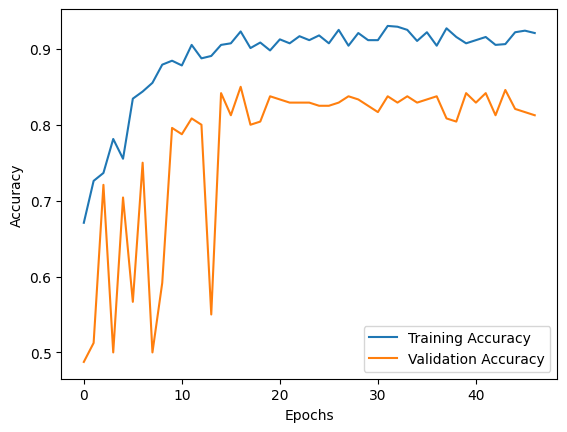

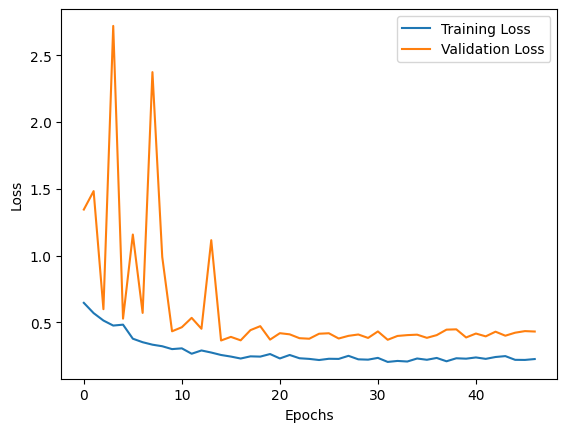

In [ ]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
# plt.savefig(plot_path)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
# plt.savefig(plot_path)

In [ ]:
score = model.evaluate(X_train, y_train)
print("Model accuracy on Train dataset: %f." %(score[1]*100))

30/30 [==============================] - 7s 128ms/step - loss: 0.2620 - accuracy: 0.8938
Model accuracy on Train dataset: 89.375001.


In [ ]:
score = model.evaluate(X_test, y_test)
print("Model accuracy on Test dataset: %f." %(score[1]*100))

8/8 [==============================] - 1s 115ms/step - loss: 0.3647 - accuracy: 0.8500
Model accuracy on Test dataset: 85.000002.


## Load Model

In [31]:
from tensorflow.keras.models import load_model
model=load_model("/content/drive/MyDrive/Dataset/ViT_Model_sem8.tf")

In [32]:
score = model.evaluate(X_train, y_train)
print("Model accuracy on Train dataset: %f." %(score[1]*100))

30/30 [==============================] - 186s 6s/step - loss: 0.2653 - accuracy: 0.9062
Model accuracy on Train dataset: 90.625000.


In [33]:
score = model.evaluate(X_test, y_test)
print("Model accuracy on Test dataset: %f." %(score[1]*100))

8/8 [==============================] - 50s 6s/step - loss: 0.4141 - accuracy: 0.8333
Model accuracy on Test dataset: 83.333331.


# Implementation of the Red Attack

### Boundary Estimation

In [34]:
import cv2
import numpy as np
from PIL import Image

height = IMG_SIZE
width = IMG_SIZE

def max_diff(img1, img2):
    return np.amax(img1-img2)

def pred(image):
    data = []
    data.append(image)
    X_test = np.array(data)
    X_test = X_test.astype('float32')/255
    X_test = X_test.reshape(1,height,width,3)
    predict_x=model.predict(X_test)
    pred_target_image = 1 if predict_x[0, 0] > 0.5 else 0
    return pred_target_image

def boundary_estimation(source,target, delta_min):
    print("Boundary Estimation")
    adv = (source+target)/2
    delta = max_diff(source, target)
    k = pred(adv)
    left = source
    right = target
    while delta > delta_min:
        print('stuck in while -> boundary_estimation')
        if pred(source) != k:
            right = adv
        else:
            left = adv
        adv = (left+right)/2.0
        k = pred(adv)
        delta = max_diff(left, right)
    return right

### Boundary Estimation Check

In [35]:
source_image_path = "/content/drive/MyDrive/Dataset/xray_pneumonia/train/NORMAL/IM-0158-0001.jpeg";
target_image_path = "/content/drive/MyDrive/Dataset/xray_pneumonia/train/PNEUMONIA/person100_virus_184.jpeg";

1/1 [==============================] - 0s 301ms/step


[]

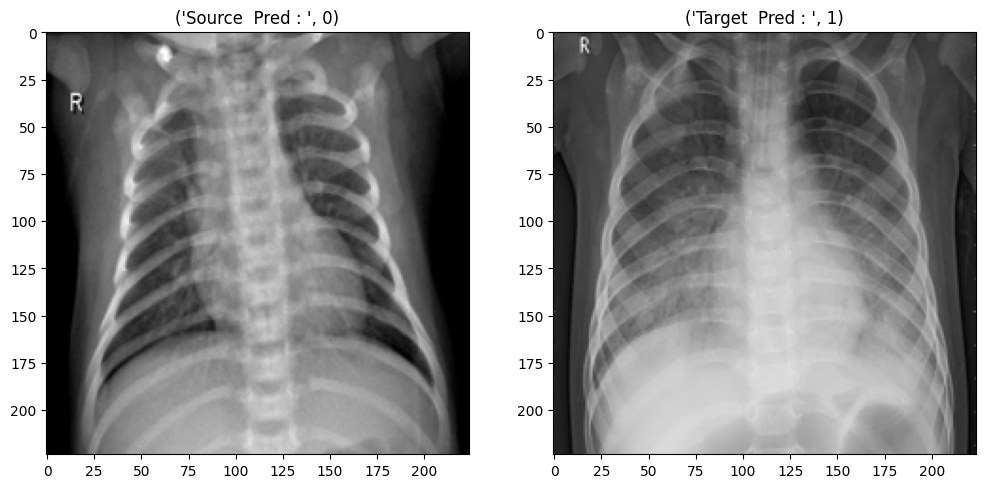

In [36]:
# image preprocessing

img = (np.asarray(Image.open(source_image_path)))
img2_rgb = np.repeat(img[:, :, np.newaxis], 3, axis=2)
image_from_array = Image.fromarray(img2_rgb, 'RGB')
img1 = image_from_array.resize((height, width))
img1=np.array(img1)
img1=img1.reshape(height,width,3)
source_image = np.array(img1)

img = (np.asarray(Image.open(target_image_path)))
img2_rgb = np.repeat(img[:, :, np.newaxis], 3, axis=2)
image_from_array = Image.fromarray(img2_rgb, 'RGB')
img2 = image_from_array.resize((height, width))
img2=np.array(img2)
img2=img2.reshape(height,width,3)
target_image = np.array(img2)

# figure plotting

fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(12, 6)
ax1.imshow(source_image[:,:,0],cmap = "gray")
ax1.set_title(("Source  Pred : ",pred(source_image)))
ax2.imshow(target_image[:,:,0],cmap = "gray")
ax2.set_title(("Target  Pred : ",pred(target_image)))
plt.plot()

Boundary Estimation
1/1 [==============================] - 0s 310ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 318ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 292ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 288ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 312ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 297ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 294ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 289ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 449ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 477ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 1s 1s/step
stuck in while -> bo

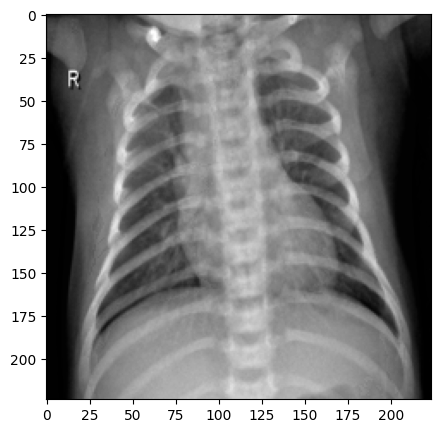

In [37]:
neww = boundary_estimation(source_image,target_image,0.1)
plt.figure(figsize=(5,5))
plt.imshow(neww[:,:,0],cmap = 'gray')
plt.plot()
print("Predicted Value : ",(pred(neww)))

### Gradient Estimation

In [38]:

def go_out(source,iout,alpha):
    print("Go Out")
    i_diff = iout - source
    pred_source = pred(source)
    inew = iout
    speedbreaker = 1
    while (pred(inew)==pred_source):
        print('stuck in while -> go_out')
        inew = inew + alpha*(i_diff)
        # update in code to increase alpha to make code faster
        speedbreaker = speedbreaker + 1
        if speedbreaker > 100:
            print('[][][] Go out speed breaker [][][]')
            break

    return inew

def array_diff(A):
  return (A*A).sum()

def gradient_estimation(source, target,adv,n,theta):
    print("Gradient Estimation")
    Io = np.zeros((height*width*3))
    X = np.random.randint(0,height*width*3,size = n)
    for i in X:
        Io[i] = 255
    Io = Io.reshape((height,width,3))
    Ii2 = adv + theta*Io
    print(pred(source),pred(adv),pred(Ii2))
    Ii2 = go_out(source,Ii2,0.01)
    print(pred(source),pred(adv),pred(Ii2))
    Ii2_new = boundary_estimation(source,Ii2,1.0)
    #comment lower line for original
    Ii2_new = go_out(source,Ii2_new,0.01)
    print(pred(source),pred(adv),pred(Ii2))
    d2 = array_diff(Ii2_new - source)
    d1 = array_diff(adv - source)
    if d2 > d1:
      return (-1,Ii2_new)
    elif d1 > d2:
      return (1,Ii2_new)
    else:
      return (0,Ii2_new)

### Gradient Estimation Testing

Gradient Estimation
1/1 [==============================] - 0s 294ms/step
0 1 1
Go Out
1/1 [==============================] - 0s 304ms/step
0 1 1
Boundary Estimation
1/1 [==============================] - 0s 324ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 286ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 359ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 472ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 462ms/step
stuck in while -> boundary_estimation
1/1 [==============================] - 0s 296ms/step
Go Out
1/1 [==============================] - 0s 275ms/step
0 1 1
-1


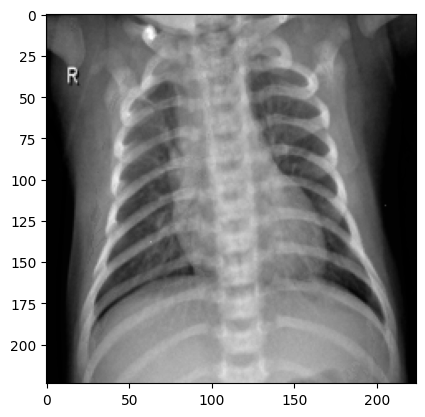

In [39]:
(a,b) = gradient_estimation(source_image,target_image,neww,5,0.196)
print(a)
plt.imshow(b[:,:,0],cmap = "gray")

### Efficient Update

In [40]:

def efficient_update(source, target, adv, I2, g, j):
    print("Efficient Update")
    delta = g*(I2 - adv)
    jump = j
    Inew = adv + jump*delta
    print(pred(source),pred(adv),pred(Inew))
    Inew = go_out(source,Inew,0.01)
    d1 = array_diff(Inew - source)
    d2 = array_diff(adv - source)
    flag, it = 0,0
    while d1 > d2:
        print('stuck in while -> efficient_update')
        jump = (jump/2.0)
        Inew = adv + jump*delta
        if(pred(Inew)==pred(source)):
            print(pred(source),pred(adv),pred(Inew))
            Inew = go_out(source,Inew,0.01)
        it = it + 1
        d1 = array_diff(Inew-source)
        if it > 100:
            break
    if d1 > d2:
        flag = 1
        print("flag is : ",flag)
        Inew = adv
    return Inew

In [41]:

def iteration(itr, source, target, n, theta, j, dmin):
    targett = target
    sourcee = source
    for i in range(itr):
        print("Iteration",i)
        adversarial_image = boundary_estimation(sourcee, targett, dmin)
        adversarial_image = go_out(sourcee,adversarial_image,0.01)
        (g, Iii2) = gradient_estimation(sourcee, targett, targett, n, theta)
        targett = efficient_update(sourcee, targett, adversarial_image, Iii2, g, j)

        if (pred(targett) == pred(source)):
            j = j/2.0
        fin = targett
        print("array_diff(fin-sourcee)",array_diff(fin-sourcee))
        if(pred(targett)==pred(sourcee)):
            fin = go_out(sourcee,targett,0.01)
        if(array_diff(fin-sourcee)<array_diff(adversarial_image-sourcee)):
            targett = fin
            #print("uopp")

    return fin

In [42]:
final = iteration(100,source_image,target_image,5,0.196,5.0,1.0)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 270ms/step
0 1 0
Go Out
1/1 [==============================] - 0s 305ms/step
stuck in while -> go_out
1/1 [==============================] - 0s 307ms/step
stuck in while -> efficient_update
1/1 [==============================] - 0s 301ms/step
0 1 0
Go Out
1/1 [==============================] - 0s 306ms/step
stuck in while -> go_out
1/1 [==============================] - 0s 294ms/step
stuck in while -> efficient_update
1/1 [==============================] - 0s 299ms/step
0 1 0
Go Out
1/1 [==============================] - 0s 478ms/step
stuck in while -> go_out
1/1 [==============================] - 0s 480ms/step
stuck in while -> efficient_update
1/1 [==============================] - 0s 295ms/step
0 1 0
Go Out
1/1 [==============================] - 0s 300ms/step
stuck in while -> go_out
1/1 [==============================] - 0s 308ms/step
stuck in while -> efficient_update
1/1 [================

### Compare result

1/1 [==============================] - 0s 298ms/step
Original Image label :  0
1/1 [==============================] - 0s 306ms/step
Perturbed Image label :  1


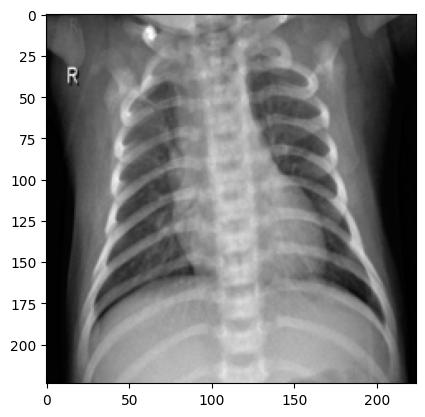

In [43]:
plt.imshow(final[:,:,0],cmap = "gray") # 100 iterations similarity = 0.9607609174014211
print("Original Image label : ", pred(source_image))
print("Perturbed Image label : ",pred(final))

1/1 [==============================] - 0s 277ms/step
Original Image label :  0
1/1 [==============================] - 0s 293ms/step
Perturbed Image label :  1


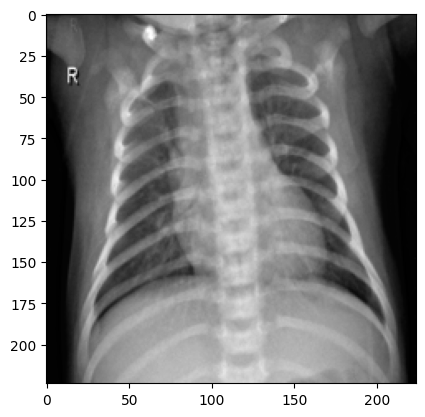

In [ ]:
plt.imshow(final[:,:,0],cmap = "gray") # 10 iterations similarity = 0.96075746054013
print("Original Image label : ", pred(source_image))
print("Perturbed Image label : ",pred(final))

1/1 [==============================] - 0s 291ms/step
Original Image label :  0
1/1 [==============================] - 0s 302ms/step
Perturbed Image label :  1


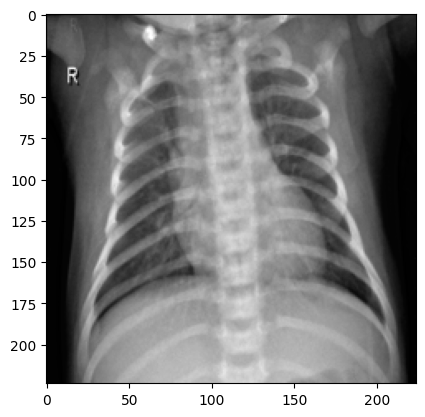

In [ ]:
plt.imshow(final[:,:,0],cmap = "gray") # 2 iterations similarity = 0.9607271067835047
print("Original Image label : ", pred(source_image))
print("Perturbed Image label : ",pred(final))

In [44]:
from skimage.metrics import structural_similarity
s = structural_similarity(source_image,final,channel_axis=2)
print(s)

0.9607609174014211


### Save Image

In [ ]:
Image.fromarray(source_image.astype('uint8')).save('/content/drive/MyDrive/Dataset/original_xray3.png')
Image.fromarray(final.astype('uint8')).save('/content/drive/MyDrive/Dataset/perturbed_xray3.png')
# s = measure.compare_ssim(arr[1],arr[0])

original = cv2.imread("/content/drive/MyDrive/Dataset/original_xray3.png")
perturb = cv2.imread("/content/drive/MyDrive/Dataset/perturbed_xray3.png")

#s = measure.compare_ssim(original,perturb,multichannel=True)
#print(s)
print(perturb)
print(original)